In [1]:
import json
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from IPython.display import Video  

from PIL import Image
plt.rcParams['figure.figsize'] = [20, 15]


In [64]:
root = pathlib.Path.cwd()
dataset_root = pathlib.Path.cwd().parent/'datasets'/'202201-gbr'
dataset_root, root

(PosixPath('/home/addy/tensorflow/datasets/202201-gbr'),
 PosixPath('/home/addy/tensorflow/gbr'))

In [3]:
train_df = pd.read_csv(dataset_root / 'train.csv')
train_df.head()

,video_id,sequence,video_frame,sequence_frame,image_id,annotations
0,0,40258,0,0,0-0,[]
1,0,40258,1,1,0-1,[]
2,0,40258,2,2,0-2,[]
3,0,40258,3,3,0-3,[]
4,0,40258,4,4,0-4,[]


In [30]:
test_df = pd.read_csv(dataset_root / 'test.csv')
test_df.head()

,video_id,sequence,video_frame,sequence_frame,image_id
0,3,17063,0,0,3-0
1,3,17063,1,1,3-1
2,3,17063,2,2,3-2


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23501 entries, 0 to 23500
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        23501 non-null  int64 
 1   sequence        23501 non-null  int64 
 2   video_frame     23501 non-null  int64 
 3   sequence_frame  23501 non-null  int64 
 4   image_id        23501 non-null  object
 5   annotations     23501 non-null  object
dtypes: int64(4), object(2)
memory usage: 1.1+ MB


In [5]:
train_df.loc[train_df.annotations != '[]', 'annotations'].head()

16    [{'x': 559, 'y': 213, 'width': 50, 'height': 32}]
17    [{'x': 558, 'y': 213, 'width': 50, 'height': 32}]
18    [{'x': 557, 'y': 213, 'width': 50, 'height': 32}]
19    [{'x': 556, 'y': 214, 'width': 50, 'height': 32}]
20    [{'x': 555, 'y': 214, 'width': 50, 'height': 32}]
Name: annotations, dtype: object

In [55]:
train_df['is_annotated'] = (train_df.annotations!='[]')
train_df['is_annotated'] = train_df['is_annotated']*1

In [7]:
train_df['annotations_num'] = train_df.annotations.str.count('}')

In [8]:
train_df.video_id.value_counts()

2    8561
1    8232
0    6708
Name: video_id, dtype: int64

In [9]:
train_df.sequence.value_counts()

29859    2988
60754    2959
8503     2843
37114    2800
26651    1525
8399     1423
22643    1248
60510    1167
53708    1077
996       923
35305     853
45518     798
15827     770
45015     617
59337     537
40258     480
29424     184
44160     151
17665      87
18048      71
Name: sequence, dtype: int64

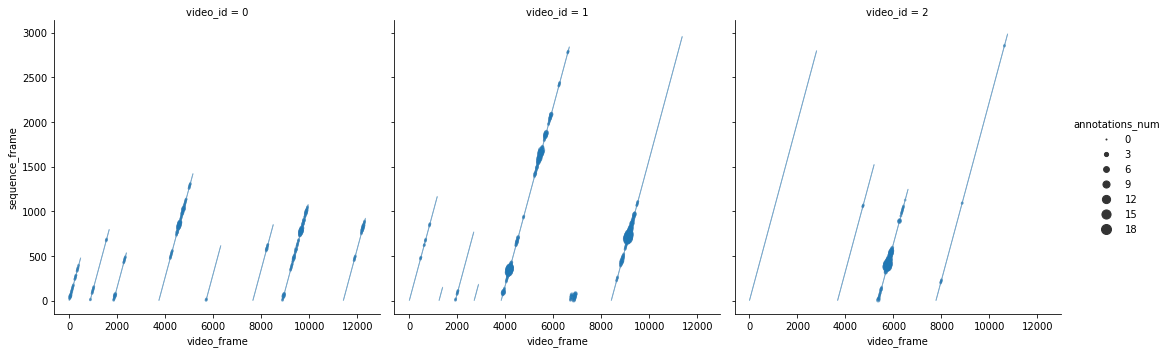

In [58]:
sns.relplot(x='video_frame', y='sequence_frame', col="video_id", size='annotations_num', sizes=(1, 100), data=train_df,  alpha=.1, kind="scatter")

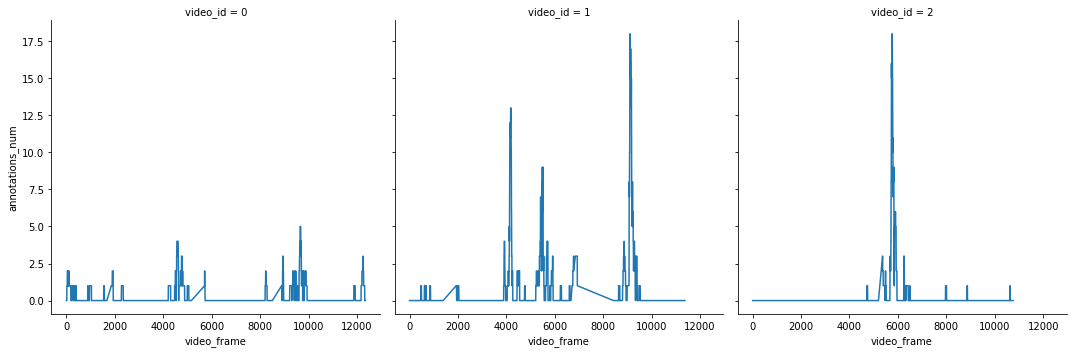

In [59]:
sns.relplot(data=train_df, x="video_frame", y="annotations_num", col='video_id', kind="line")

In [12]:
train_df['annotations'] = train_df["annotations"].apply(eval)

In [19]:
def toNumpy(a):
    return np.asarray([[x['x'], x['y'], x['width'], x['height']] for x in a])
train_df['annotations_np'] = train_df["annotations"].apply(toNumpy)

In [20]:
index = 32
a = train_df["annotations"].iloc[index]
print(a, a[0], (a[0]['x'], a[0]['y']))
print(train_df['annotations_np'].iloc[index])

[{'x': 518, 'y': 165, 'width': 73, 'height': 56}] {'x': 518, 'y': 165, 'width': 73, 'height': 56} (518, 165)
[[518 165  73  56]]


In [21]:
annotations_df = pd.DataFrame.from_records([x  for _list in train_df['annotations_np'] for x in _list])
annotations_df.columns = ['x','y','width','height']
annotations_df.head()

,x,y,width,height
0,559,213,50,32
1,558,213,50,32
2,557,213,50,32
3,556,214,50,32
4,555,214,50,32


In [106]:
annotations_df.shape

(11898, 4)

<AxesSubplot:xlabel='x', ylabel='y'>

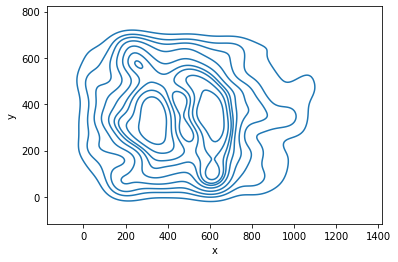

In [101]:
sns.kdeplot(
    data=annotations_df,
    x="x",
    y="y",
    thresh=.1,
)

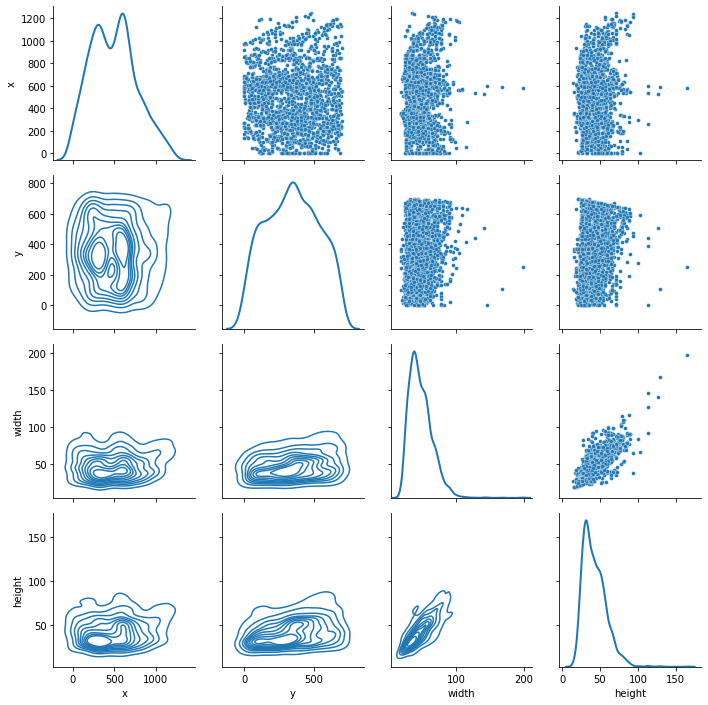

In [105]:
g = sns.PairGrid(annotations_df.sample(2000), diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

In [31]:
train_df['image_path'] = dataset_root / 'train_images'/("video_" + train_df.video_id.astype(str))/ (train_df.video_frame.astype(str) + ".jpg")
test_df['image_path'] = dataset_root / 'train_images'/("video_" + test_df.video_id.astype(str))/ (test_df.video_frame.astype(str) + ".jpg")

In [60]:
row = train_df[train_df.annotations_num > 10].sample().iloc[0]
row

video_id                                                           1
sequence                                                       60754
video_frame                                                     9118
sequence_frame                                                   702
image_id                                                      1-9118
annotations        [{'x': 624, 'y': 359, 'width': 44, 'height': 4...
is_annotated                                                       1
annotations_num                                                   15
annotations_np     [[624, 359, 44, 49], [898, 539, 65, 61], [852,...
image_path         /home/addy/tensorflow/datasets/202201-gbr/trai...
Name: 12683, dtype: object

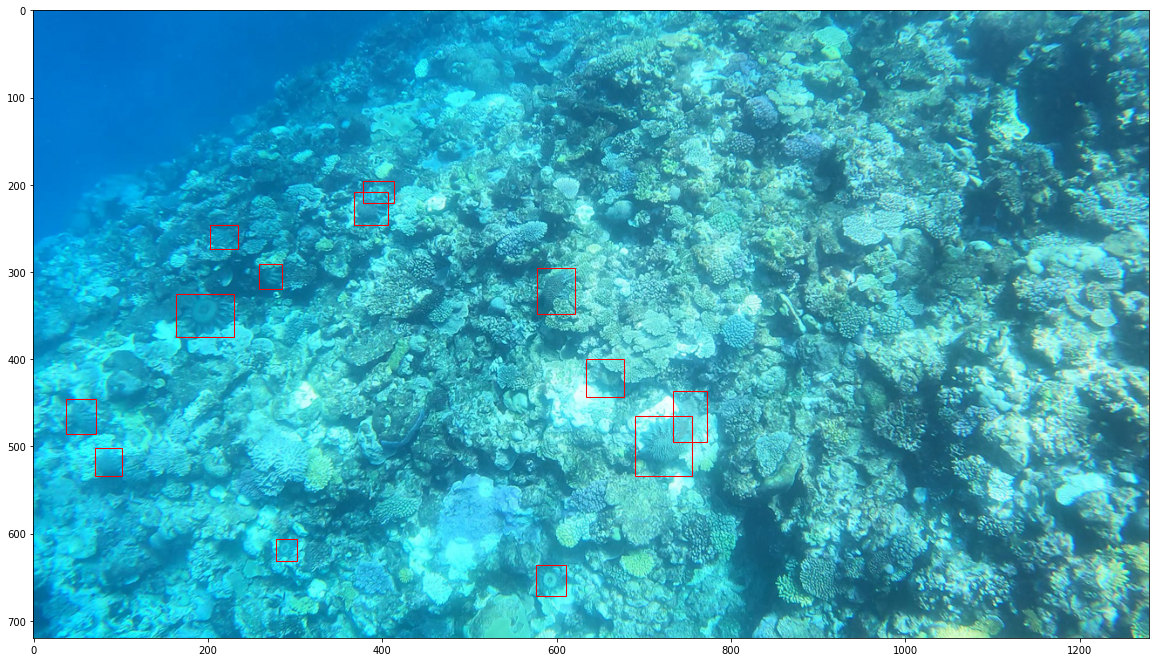

In [28]:
im = Image.open(row.image_path)
# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)

for i in row.annotations:
    rect = patches.Rectangle((i['x'], i['y']), i['width'], i['height'], linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
    ax.add_patch(rect)


plt.show()


In [32]:
train_df

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,is_annotated,annotations_num,annotations_np,image_path
0,0,40258,0,0,0-0,[],False,0,[],/home/addy/tensorflow/datasets/202201-gbr/trai...
1,0,40258,1,1,0-1,[],False,0,[],/home/addy/tensorflow/datasets/202201-gbr/trai...
2,0,40258,2,2,0-2,[],False,0,[],/home/addy/tensorflow/datasets/202201-gbr/trai...
3,0,40258,3,3,0-3,[],False,0,[],/home/addy/tensorflow/datasets/202201-gbr/trai...
4,0,40258,4,4,0-4,[],False,0,[],/home/addy/tensorflow/datasets/202201-gbr/trai...
...,...,...,...,...,...,...,...,...,...,...
23496,2,29859,10755,2983,2-10755,[],False,0,[],/home/addy/tensorflow/datasets/202201-gbr/trai...
23497,2,29859,10756,2984,2-10756,[],False,0,[],/home/addy/tensorflow/datasets/202201-gbr/trai...
23498,2,29859,10757,2985,2-10757,[],False,0,[],/home/addy/tensorflow/datasets/202201-gbr/trai...
23499,2,29859,10758,2986,2-10758,[],False,0,[],/home/addy/tensorflow/datasets/202201-gbr/trai...


In [33]:
test_df

,video_id,sequence,video_frame,sequence_frame,image_id,image_path
0,3,17063,0,0,3-0,/home/addy/tensorflow/datasets/202201-gbr/trai...
1,3,17063,1,1,3-1,/home/addy/tensorflow/datasets/202201-gbr/trai...
2,3,17063,2,2,3-2,/home/addy/tensorflow/datasets/202201-gbr/trai...


In [62]:
table = pd.pivot_table(train_df, values=['is_annotated'], index=['sequence'],
                    columns=['annotations_num'], aggfunc=np.count_nonzero)
table.fillna(0)

is_annotated                                               \
annotations_num           0      1      2     3      4     5     6     7    
sequence                                                                    
996                    714.0  140.0   68.0   1.0    0.0   0.0   0.0   0.0   
8399                   859.0  389.0   75.0  43.0   57.0   0.0   0.0   0.0   
8503                  1743.0  472.0  250.0  94.0  103.0  20.0  33.0  33.0   
15827                  696.0   74.0    0.0   0.0    0.0   0.0   0.0   0.0   
17665                    0.0    2.0    2.0  83.0    0.0   0.0   0.0   0.0   
18048                    0.0   34.0   30.0   7.0    0.0   0.0   0.0   0.0   
22643                  671.0  234.0   97.0  44.0   13.0  62.0  10.0   6.0   
26651                 1496.0   29.0    0.0   0.0    0.0   0.0   0.0   0.0   
29424                  184.0    0.0    0.0   0.0    0.0   0.0   0.0   0.0   
29859                 2917.0   71.0    0.0   0.0    0.0   0.0   0.0   0.0   
35305                  773.0   71.0    9.0   0.0    0.0   0.0   0.0   0.0   
37114                 2800.0    0.0    0.0   0.0    0.0   0.0   0.0   0.0   
40258                  195.0  255.0   30.0   0.0    0.0   0.0   0.0   0.0   
44160                  151.0    0.0    0.0   0.0    0.0   0.0   0.0   0.0   
45015                  595.0   20.0    2.0   0.0    0.0   0.0   0.0   0.0   
45518                  675.0  123.0    0.0   0.0    0.0   0.0   0.0   0.0   
53708                  373.0  425.0  196.0  28.0   30.0  25.0   0.0   0.0   
59337                  381.0  119.0   37.0   0.0    0.0   0.0   0.0   0.0   
60510                 1054.0  113.0    0.0   0.0    0.0   0.0   0.0   0.0   
60754                 2305.0  230.0  146.0  74.0   37.0  27.0  16.0  22.0   

                                                                             \
annotations_num    8     9     10    11    12    13    14    15    16    17   
sequence                                                                      
996               0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
8399              0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
8503             16.0  14.0   9.0  30.0  12.0  14.0   0.0   0.0   0.0   0.0   
15827             0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
17665             0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
18048             0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
22643            26.0  15.0  12.0   6.0   3.0   1.0   2.0  24.0  16.0   5.0   
26651             0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
29424             0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
29859             0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
35305             0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
37114             0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
40258             0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
44160             0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
45015             0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
45518             0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
53708             0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
59337             0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
60510             0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
60754            16.0   3.0   5.0   8.0   2.0   4.0  20.0  16.0  12.0  14.0   

                      
annotations_num   18  
sequence              
996              0.0  
8399             0.0  
8503             0.0  
15827            0.0  
17665            0.0  
18048            0.0  
22643            1.0  
26651            0.0  
29424            0.0  
29859            0.0  
35305            0.0  
37114            0.0  
40258            0.0  
44160            0.0  
45015            0.0  
45518       

In [63]:
train_df[['sequence','annotations_num','image_path']].groupby(['sequence','annotations_num']).count()

image_path
sequence annotations_num            
996      0                       714
         1                       140
         2                        68
         3                         1
8399     0                       859
...                              ...
60754    14                       20
         15                       16
         16                       12
         17                       14
         18                        2

[98 rows x 1 columns]

In [65]:
train_df.to_pickle(root / 'intermedia' / 'train_df.pkl')
test_df.to_pickle(root / 'intermedia' / 'test_df.pkl')